In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[ 4.24393221,  9.7670988 ,  3.29460098, -1.80312927, -1.63840906,
        -3.96938464, -4.4781004 ,  6.30458821, -0.60340368,  0.64621154],
       [-0.42940622, -0.22249324, -0.12234161, -0.33164281, -0.38781967,
         0.45212345,  0.24768937, -0.61156635, -0.89088477, -1.59514532]])

In [4]:
test_Features[:2]

array([[-0.52283517, -0.43707361, -0.28061961, -0.2036399 , -0.33442982,
         0.15038121, -0.05690224, -0.35631462, -0.90528928, -1.46761123],
       [ 1.67988341, -0.17926211,  0.06556061, -0.91859633, -0.91538379,
        -0.58621476, -3.24539829, -0.39583564,  0.14235156, -0.85669716]])

In [5]:
train_Label[:4]

array([0, 1, 1, 1])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([1, 0, 0, 1])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=20,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [14]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 1s - loss: 0.6833 - acc: 0.7134 - val_loss: 0.6713 - val_acc: 0.7063
Epoch 2/30
 - 0s - loss: 0.6469 - acc: 0.7468 - val_loss: 0.6229 - val_acc: 0.7306
Epoch 3/30
 - 0s - loss: 0.5863 - acc: 0.7611 - val_loss: 0.5620 - val_acc: 0.7444
Epoch 4/30
 - 0s - loss: 0.5255 - acc: 0.7737 - val_loss: 0.5109 - val_acc: 0.7700
Epoch 5/30
 - 0s - loss: 0.4813 - acc: 0.7835 - val_loss: 0.4748 - val_acc: 0.7766
Epoch 6/30
 - 0s - loss: 0.4536 - acc: 0.7911 - val_loss: 0.4523 - val_acc: 0.7891
Epoch 7/30
 - 0s - loss: 0.4374 - acc: 0.7973 - val_loss: 0.4390 - val_acc: 0.7911
Epoch 8/30
 - 0s - loss: 0.4275 - acc: 0.8011 - val_loss: 0.4303 - val_acc: 0.7930
Epoch 9/30
 - 0s - loss: 0.4207 - acc: 0.8049 - val_loss: 0.4247 - val_acc: 0.7963
Epoch 10/30
 - 0s - loss: 0.4157 - acc: 0.8068 - val_loss: 0.4210 - val_acc: 0.7996
Epoch 11/30
 - 0s - loss: 0.4113 - acc: 0.8104 - val_loss: 0.4174 - val_acc: 0.8035
Epoch 12/30
 - 0s - loss: 0.4077 - a

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

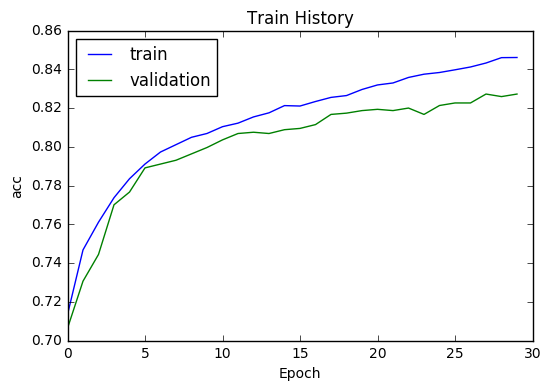

In [16]:
show_train_history(train_history,'acc','val_acc')

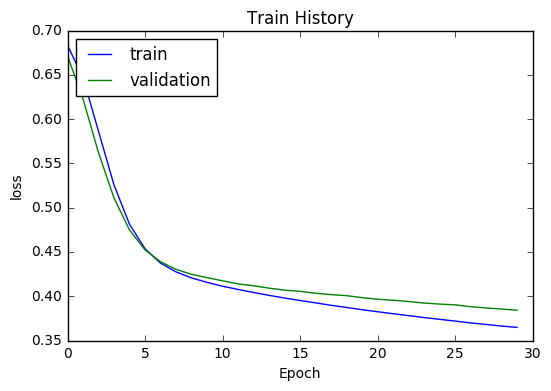

In [17]:
show_train_history(train_history,'loss','val_loss')

In [18]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 61us/step


In [19]:
scores[1]

0.843322818086225